# Scrape stroke order diagrams from www.kaku-navi.com
One diagram at a time

In [1]:
import io
import math
import requests
import time

from bs4 import BeautifulSoup
from PIL import Image, ImageOps

## Set parameters
The list `KANJI_LIST` should contain the kanji to generate stroke order diagrams for.

In [2]:
KANJI_LIST = ['栃', '媛', '梨', '茨', '鹿', '阜', '埼', '岡', '奈', '熊', '阪']

KANJI = KANJI_LIST[0]
KANJI

'婆'

`MAX_PER_ROW` indicated how many diagrams should be placed in a row at most.

In [3]:
MAX_PER_ROW = 10

## Index page by Kanken levels
This page provides the mapping between the desired kanji and the associated page on the website.

In [4]:
INDEX_PAGE = 'https://kaku-navi.com/kanken/'

result = requests.get(INDEX_PAGE)

if result.status_code == 200:
    index_page = BeautifulSoup(result.content, "html.parser")
else:
    print('Request failed.')

The following should be the link to the page of the desired kanji.

In [5]:
link = [s for s in index_page.find_all('a') if KANJI in s][0]
link

<a class="resizeSquare" href="../kanji/kanji03143.html">婆</a>

## Analyse the kanji page to find the links the to stroke order diagrams

In [6]:
kaku_link = 'https://kaku-navi.com/' + link['href'][3:]

result = requests.get(kaku_link)

if result.status_code == 200:
    soup = BeautifulSoup(result.content, "html.parser")
else:
    print('Request failed.')

In [7]:
strokes = [i for i in soup.find_all('img') if '画目' in i['alt']]
strokes

[<img alt="「婆」1画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_01.jpg" width="100%"/>,
 <img alt="「婆」2画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_02.jpg" width="100%"/>,
 <img alt="「婆」3画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_03.jpg" width="100%"/>,
 <img alt="「婆」4画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_04.jpg" width="100%"/>,
 <img alt="「婆」5画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_05.jpg" width="100%"/>,
 <img alt="「婆」6画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_06.jpg" width="100%"/>,
 <img alt="「婆」7画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_07.jpg" width="100%"/>,
 <img alt="「婆」8画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_08.jpg" width="100%"/>,
 <img alt="「婆」9画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_09.jpg" width="100%"/>,
 <img alt="「婆」10画目" height="100%" loading="lazy" src="/img/kanji/kanji03143_10.jpg" width="100%"/>,
 <img alt

## Fetch all the stroke order diagrams

In [8]:
stroke_diagrams = []

for stroke in strokes:
    img_link = 'https://kaku-navi.com' + stroke['src']
    
    img_content = requests.get(img_link)
    
    if result.status_code == 200:
        img_file = io.BytesIO(img_content.content)
    else:
        print(f'Failed to get {img_link}')
        time.sleep(1)
        continue
    
    img = Image.open(img_file).convert('RGB')
    img_gray = ImageOps.grayscale(img)
    
    stroke_diagrams.append(img_gray)
    
    print(f'Fetched {img_link}')
    time.sleep(1)

Fetched https://kaku-navi.com/img/kanji/kanji03143_01.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_02.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_03.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_04.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_05.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_06.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_07.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_08.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_09.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_10.jpg
Fetched https://kaku-navi.com/img/kanji/kanji03143_11.jpg


## Combine the diagrams into a single figure with all the steps

In [9]:
N_ROWS = math.ceil(len(stroke_diagrams) / MAX_PER_ROW)
N_ROWS

2

In [10]:
combined_diagram = Image.new(mode='L', size=(640 * MAX_PER_ROW, 640 * N_ROWS), color=255)

In [11]:
x_offset = 0
y_offset = 0

for diagram in stroke_diagrams:
    combined_diagram.paste(diagram, (x_offset, y_offset))
    x_offset += 640
    if x_offset > 640 * (MAX_PER_ROW - 1):
        x_offset = 0
        y_offset += 640

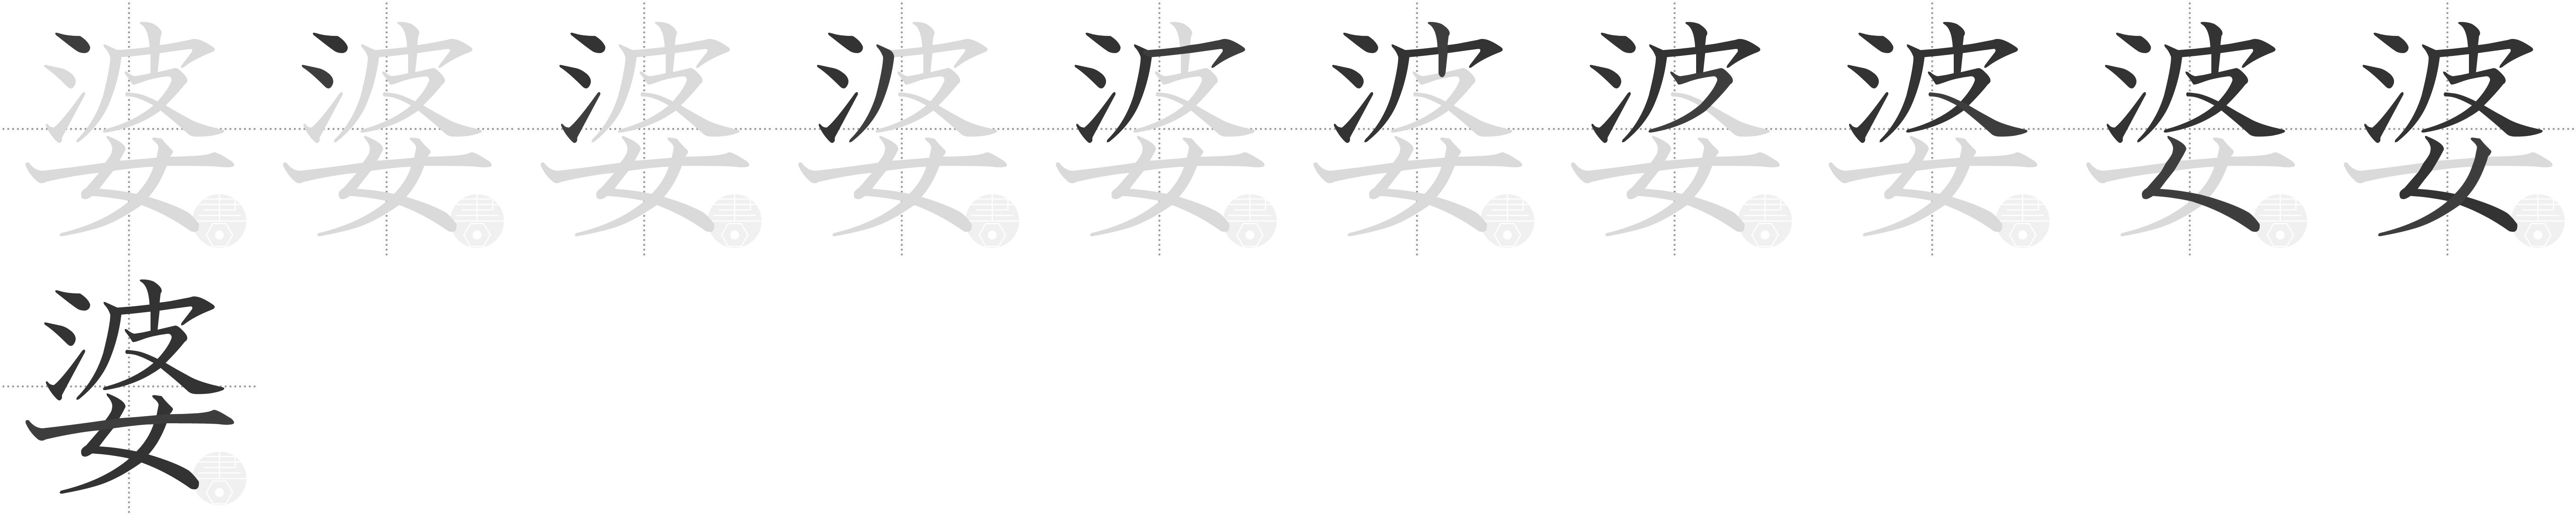

In [15]:
combined_diagram

In [13]:
combined_diagram.save(f'./data/wr_old_supplements/stroke_order_{KANJI}.jpg')